In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)


kc = pd.read_csv("kc_house_data.csv")
print(kc.head())
print(kc.shape)
print(kc.dtypes)

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

In [3]:
kc = kc.drop(['id', 'date', 'view', 'waterfront'],axis=1)

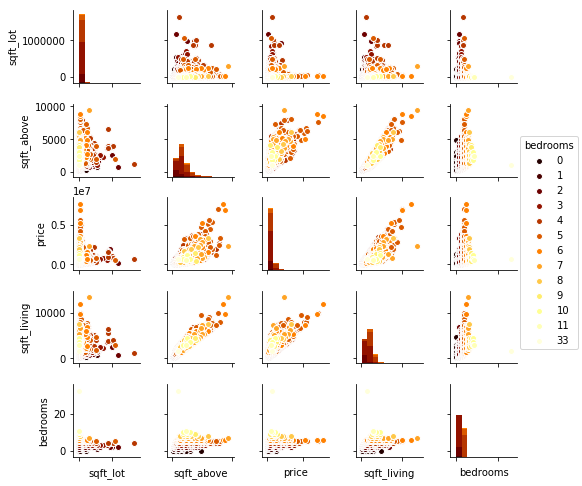

In [4]:
p = sns.pairplot(kc[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot',size=1.4)
p.set(xticklabels=[])

In [5]:
# extract our target variable -- House prices -- into an array 
y = kc.price.values
y # is an array with the price variable 

# Drop price from the house dataframe 
kc = kc.drop(['price'], axis=1)

# Create a matrix from the remaining data
X = kc.as_matrix()

# Store the column/feature names into a list "colnames"
colnames = kc.columns

# LASSO REG

In [6]:
# create a lasso regressor
lasso = Lasso(alpha=0.2, normalize=True)
lasso.fit(X,y)
lasso_coef = lasso.coef_
print(lasso_coef)

[-4.60371681e+04  4.27861001e+04  2.09910162e+02  1.55917506e-01
  1.10125833e+04  2.91820514e+04  1.01162856e+05 -2.23999188e+01
 -3.02780899e+01 -2.82963779e+03  3.48449523e+01 -4.76908000e+02
  5.55627700e+05 -2.51484241e+05  4.00319113e+01 -3.23987600e-01]


/Users/zuba818/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


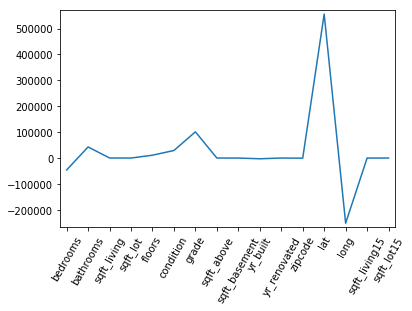

In [7]:
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

In [8]:
# Import the necessary module
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.64113769 0.65607482 0.6615889  0.67507893 0.65552482]
Average 5-Fold CV Score: 0.65788103454853


In [9]:
from sklearn.linear_model import Ridge

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
  
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

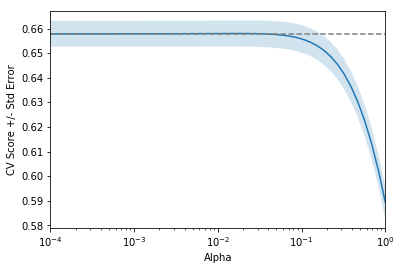

In [10]:
display_plot(ridge_scores, ridge_scores_std)